In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Set the maximum column width
pd.set_option('display.max_colwidth', 100)
# Magic function to display plots in notebook
%matplotlib inline

In [2]:
heart_df = pd.read_csv('heart_disease_prediction.csv')

# View first five rows
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(f'Number of features: {heart_df.shape[1]}')
print(f'Number of observations: {heart_df.shape[0]}')

Number of features: 12
Number of observations: 918


In [4]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

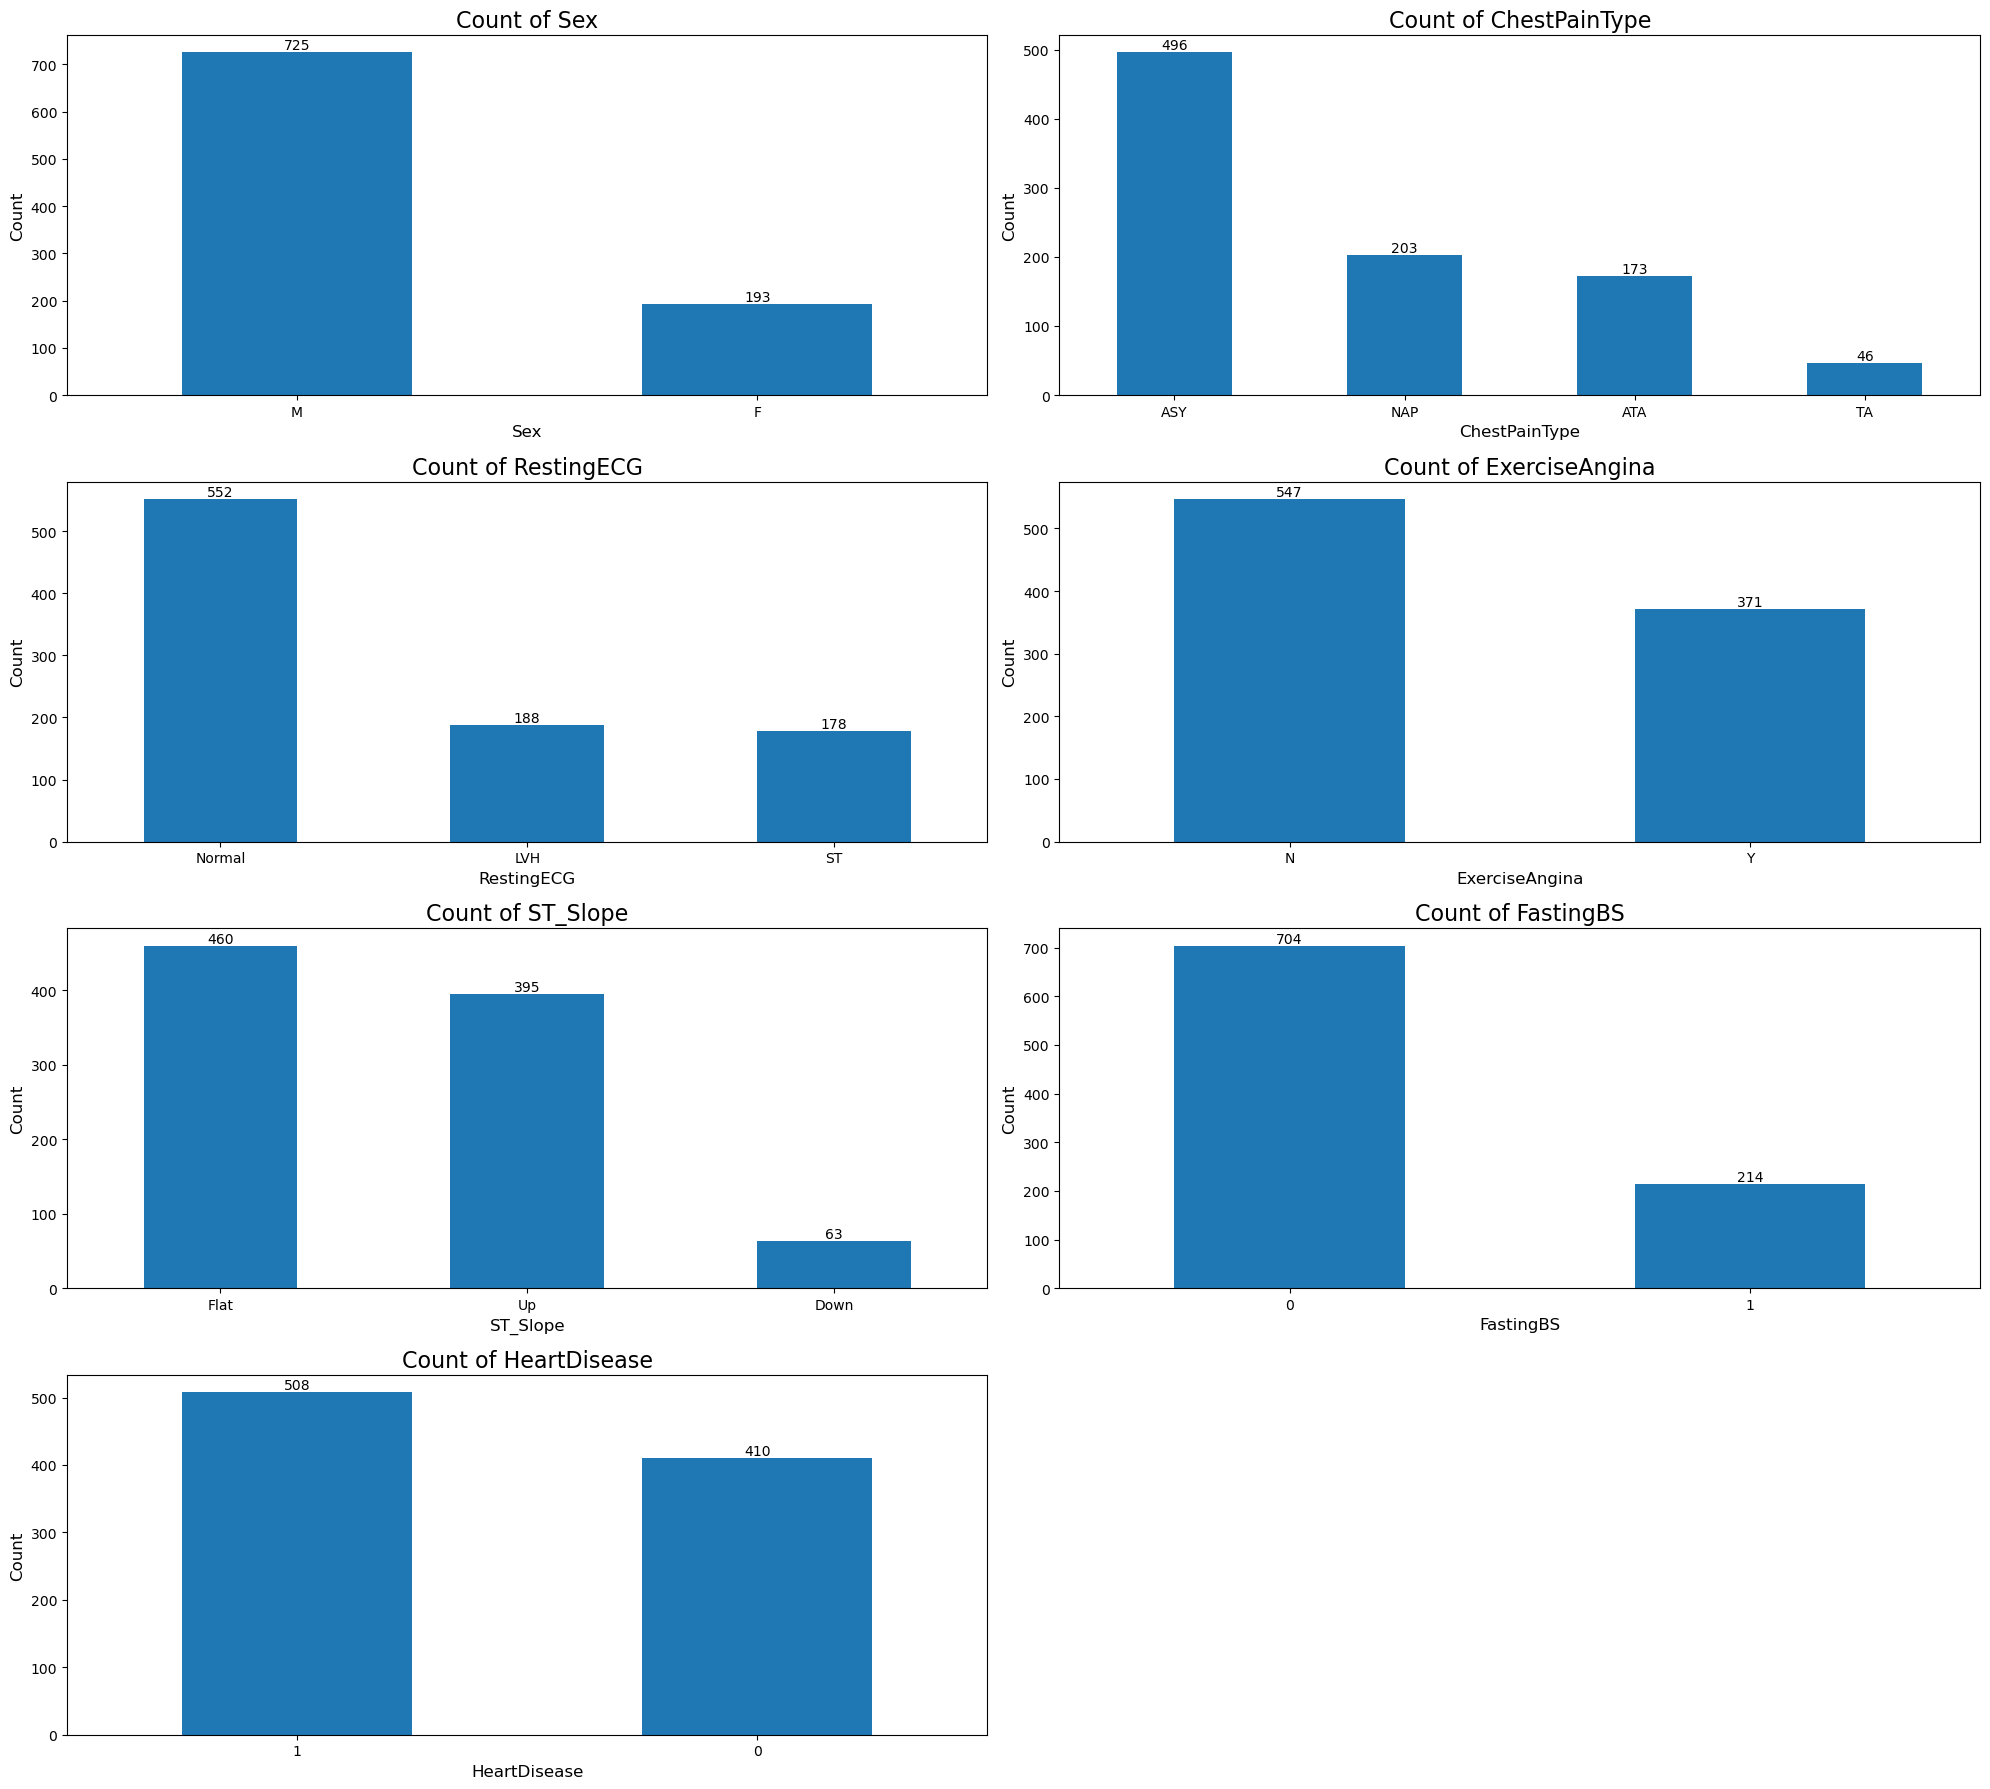

In [9]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,18))

for i, col in enumerate(cat_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    counts = heart_df[col].value_counts()

    ax = counts.plot(kind='bar', rot=0, color='#1f77b4', ax=axes[row_idx, col_idx])

    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)

    ax.set_title(f'Count of {col}', size=16)
    
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')

if len(cat_cols) % num_cols != 0:
    blank_ax = axes[num_rows-1, num_cols-1]
    blank_ax.axis('off')

fig.tight_layout()
plt.show()

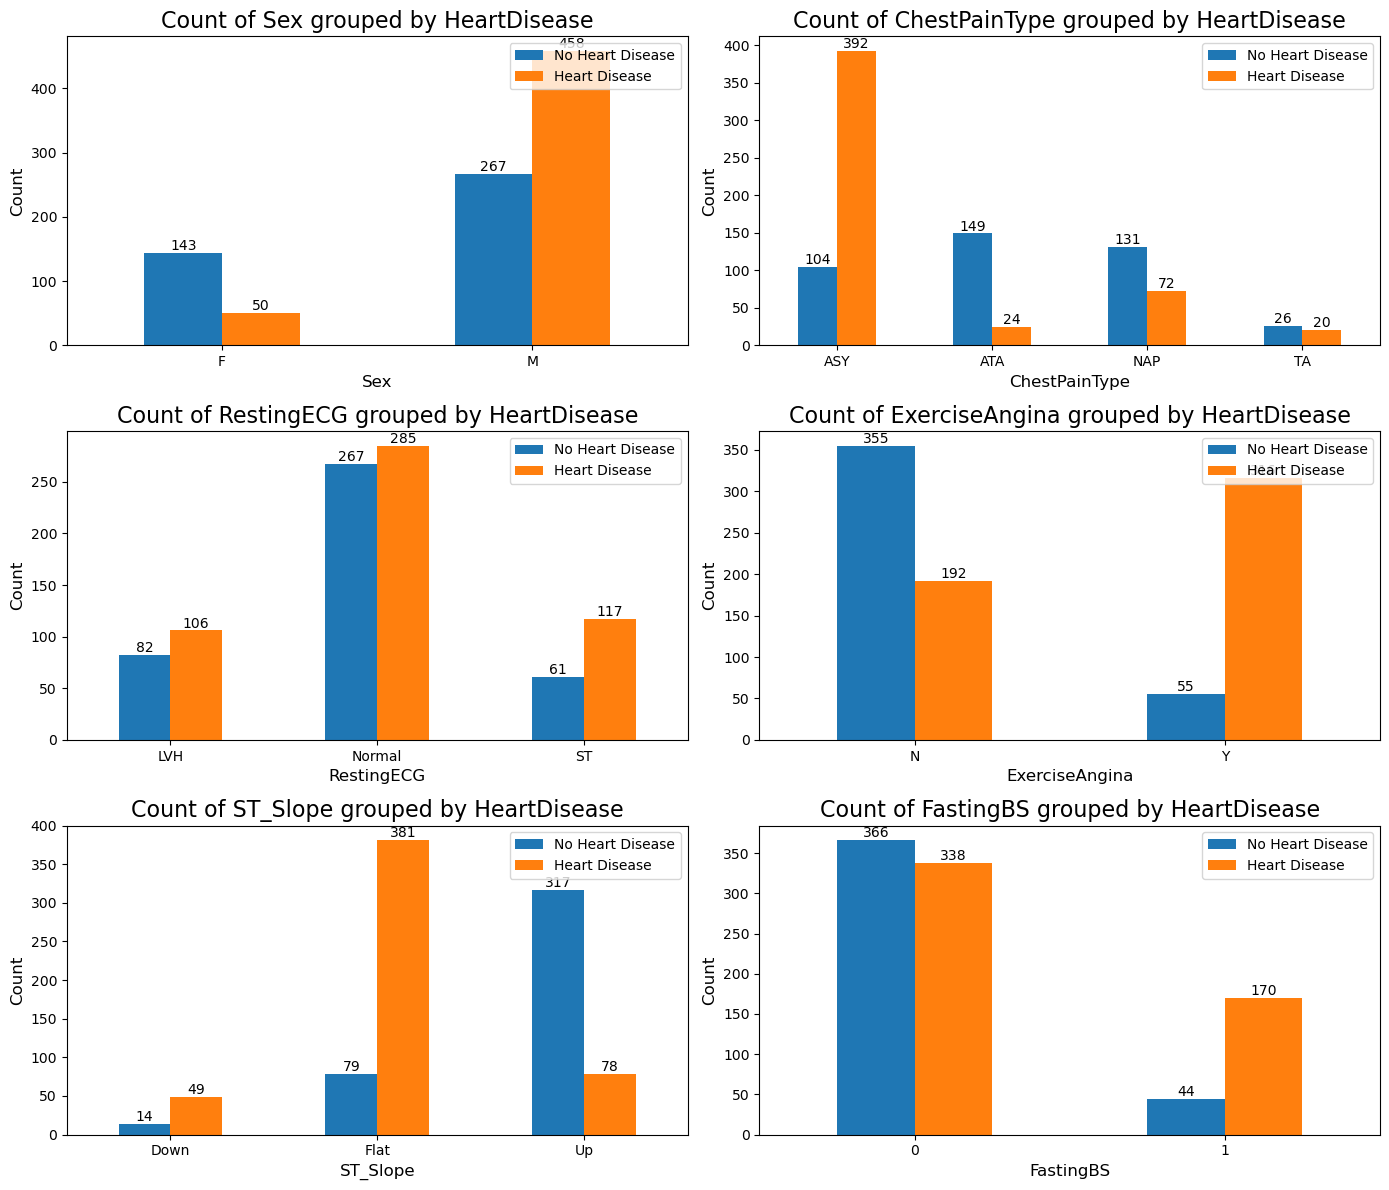

In [10]:
cat_cols_2 = cat_cols[:-1]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))

for i, col in enumerate(cat_cols_2):
    row_idx = i // 2
    col_idx = i % 2

    counts = heart_df.groupby(['HeartDisease', col]).size().reset_index(name='count')
    

    ax = counts.pivot(index=col, columns='HeartDisease', values='count').plot(kind='bar', ax=axes[row_idx, col_idx], rot=0)
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
    ax.set_title(f'Count of {col} grouped by HeartDisease', size=16)
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], loc='upper right')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5), 
                    textcoords='offset points', ha='center', va='center')
        
plt.tight_layout()
plt.show()

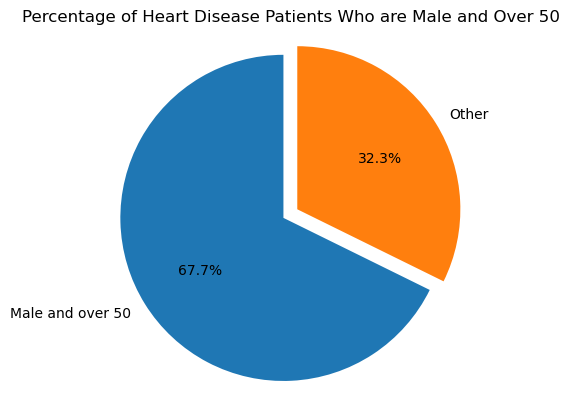

In [11]:
heart_disease_df = heart_df[heart_df['HeartDisease'] == 1]

male_over_50 = ((heart_disease_df['Sex'] == 'M') & (heart_disease_df['Age'] > 50)).sum()
total_heart_disease = len(heart_disease_df)
percent_male_over_50 = male_over_50 / total_heart_disease * 100

labels = ['Male and over 50', 'Other']
sizes = [percent_male_over_50, 100 - percent_male_over_50]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
ax.set_title('Percentage of Heart Disease Patients Who are Male and Over 50')
plt.show()

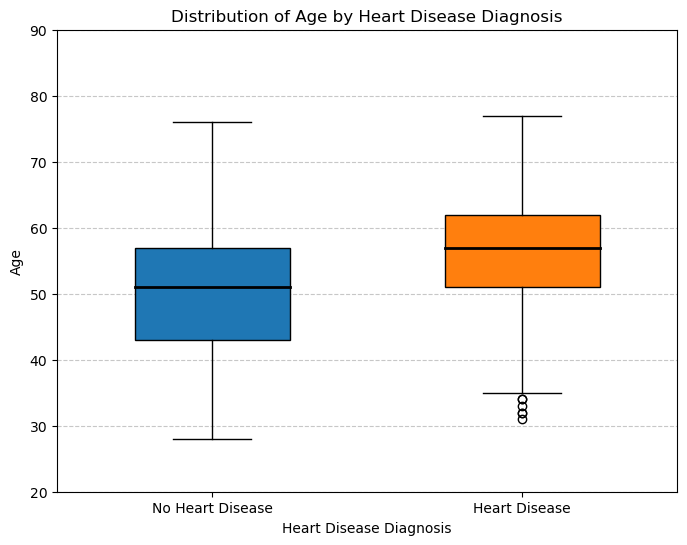

In [12]:
plt.figure(figsize=(8, 6))

bp = plt.boxplot(x=[heart_df[heart_df['HeartDisease'] == 0]['Age'], heart_df[heart_df['HeartDisease'] == 1]['Age']],
                 labels=['No Heart Disease', 'Heart Disease'], patch_artist=True, widths=0.5, showfliers=True)

colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color='black', linewidth=2)

plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Age')
plt.title('Distribution of Age by Heart Disease Diagnosis')

plt.ylim(20, 90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [13]:
print(f"Number of rows that have 0 values for RestingBP: {(heart_df['RestingBP'] == 0).sum()}")
print(f"Number of rows that have 0 values for Cholesterol: {(heart_df['Cholesterol'] == 0).sum()}")

Number of rows that have 0 values for RestingBP: 1
Number of rows that have 0 values for Cholesterol: 172


In [14]:
heart_clean_df = heart_df.copy()
heart_clean_df['RestingBP'] = heart_clean_df.groupby('HeartDisease')['RestingBP'].apply(lambda x: x.replace(0, x.median()))

heart_clean_df['Cholesterol'] = heart_clean_df.groupby('HeartDisease')['Cholesterol'].apply(lambda x: x.replace(0, x.median()))

In [15]:
heart_clean_df[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,918.000000,918.000000
mean,239.675381,132.540305
std,54.328249,17.989941
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [16]:
heart_clean_df = pd.get_dummies(heart_clean_df, drop_first=True)

heart_clean_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [17]:
print(f'Number of columns with dummy variables: {heart_clean_df.shape[1]}')

Number of columns with dummy variables: 16


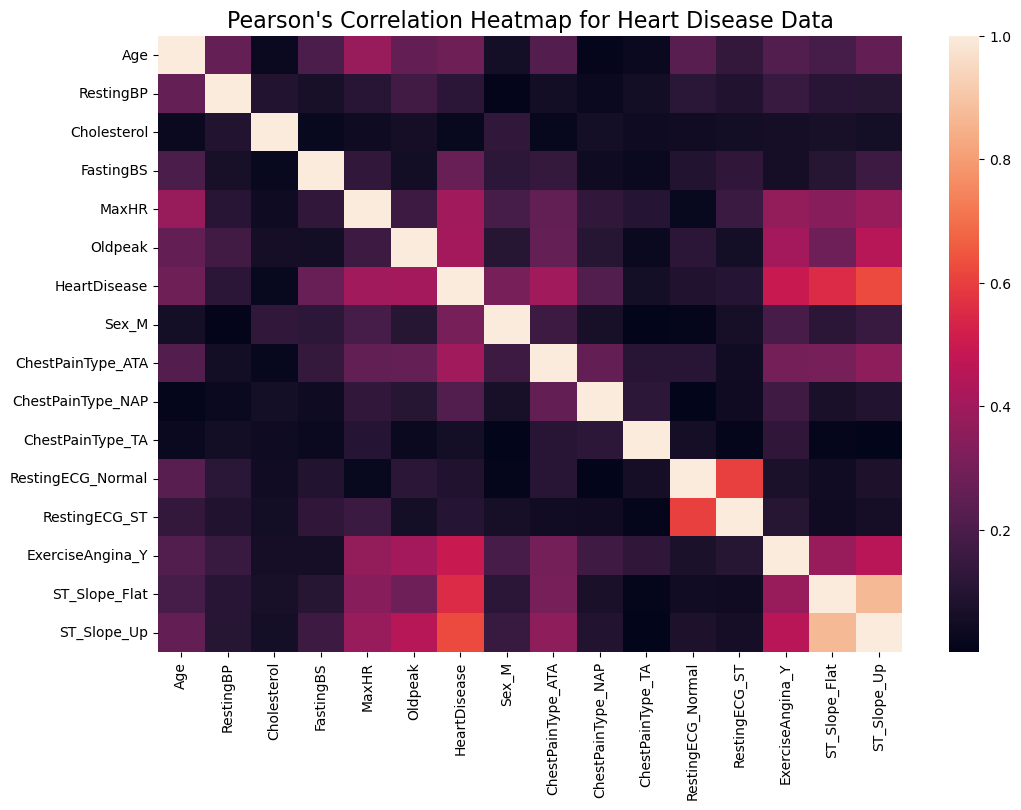

In [18]:
corr_mat = abs(heart_clean_df.corr())

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat)
plt.title("Pearson's Correlation Heatmap for Heart Disease Data", fontsize=16)
plt.show()

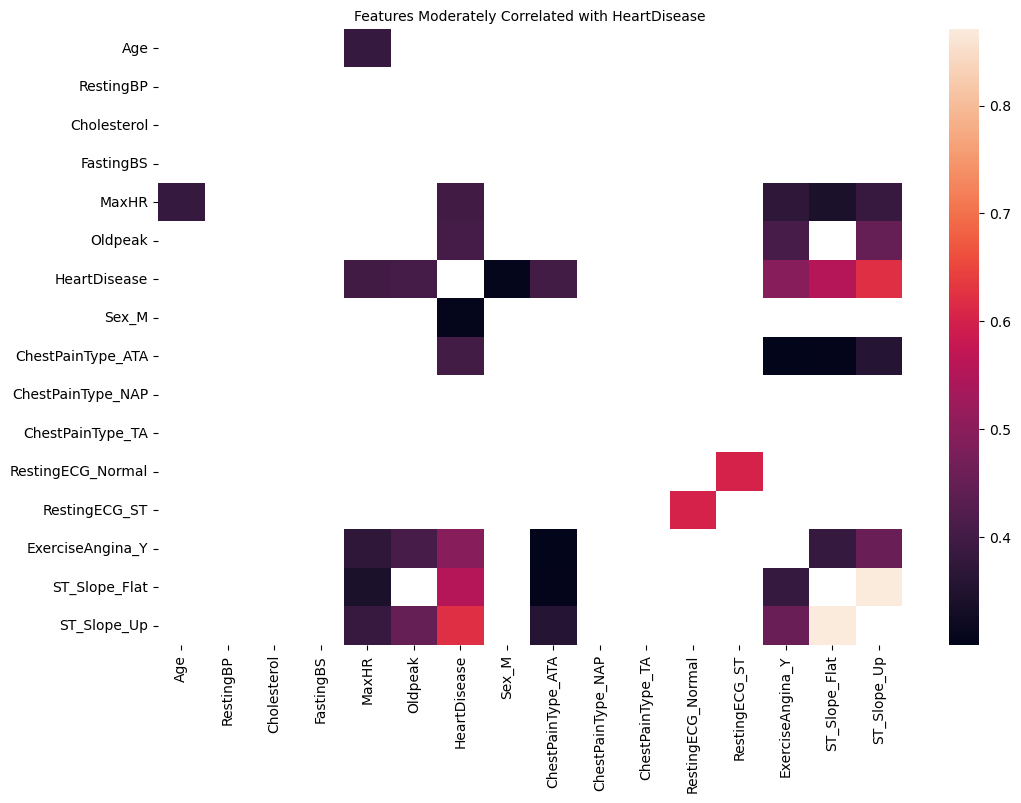

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat[(corr_mat > 0.3) & (corr_mat < 1)])
plt.title('Features Moderately Correlated with HeartDisease', size=10)
plt.show()

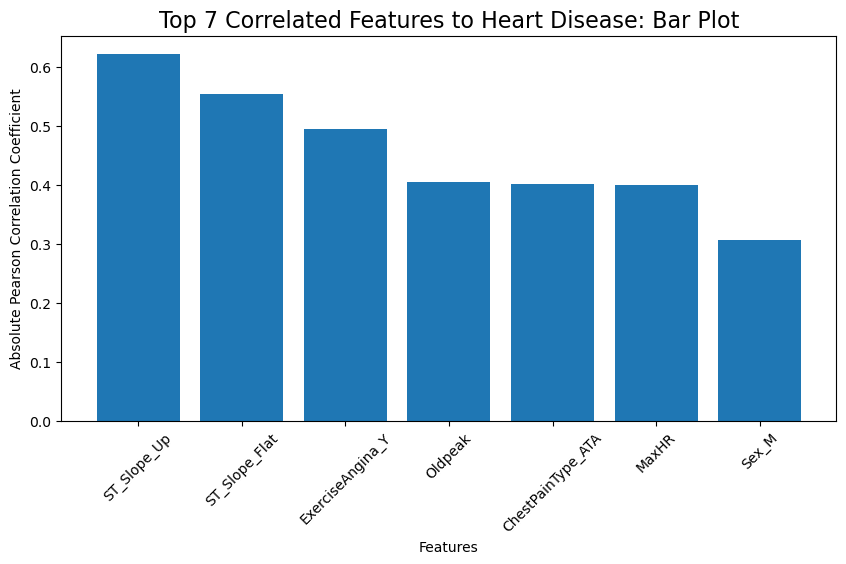

In [20]:
top_7_features = (corr_mat['HeartDisease'] ** 2).sort_values(ascending=False)[1:8].index.tolist()

plt.figure(figsize=(10, 5))
plt.bar(x=top_7_features, height=corr_mat.loc[top_7_features, 'HeartDisease'])
plt.xticks(rotation=45)
plt.title('Top 7 Correlated Features to Heart Disease: Bar Plot', fontsize=16)
plt.ylabel('Absolute Pearson Correlation Coefficient')
plt.xlabel('Features')
plt.show()

In [21]:
X = heart_clean_df.drop('HeartDisease', axis=1)
y = heart_clean_df['HeartDisease']

sel_features = [
                'Oldpeak',
                'Sex_M',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X[sel_features], y,
                                                  test_size=0.15,
                                                  random_state=42)


scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_val_scaled = scaler.transform(X_val)


knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

accuracy = knn.score(X_val_scaled, y_val)

print(f'Model accuracy: {accuracy*100:.2f}%')

Model accuracy: 75.36%


In [23]:
params = {'n_neighbors': list(range(1,21)),
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'manhattan']}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')

knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

print(f'Best score: {best_score*100:0.2f}%')
print(f'Best parameters: {best_params}')

Best score: 85.64%
Best parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


In [25]:
X_test_scaled = scaler.transform(X_val)

best_model = knn_grid.best_estimator_

predictions = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_val, predictions)
print(f'{accuracy*100:.2f}%')

74.64%


In [26]:
results = {}

random_states = [0, 415, 417, 419, 2023]

for state in random_states:
    X_train, _, y_train, _ = train_test_split(X[sel_features], y, test_size=0.15, random_state=state)

    scaler = MinMaxScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    knn = KNeighborsClassifier()

    params = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan']}

    knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')

    knn_grid.fit(X_train_scaled, y_train)

    best_score = knn_grid.best_score_
    best_params = knn_grid.best_params_

    results[f'random_state_{state}'] = {'best_score': round(best_score*100,2), 'best_params': best_params}

In [27]:
# Convert results dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,best_score,best_params
random_state_0,85.13,"{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'uniform'}"
random_state_415,84.10,"{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}"
random_state_417,84.62,"{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}"
random_state_419,83.72,"{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'uniform'}"
random_state_2023,83.33,"{'metric': 'minkowski', 'n_neighbors': 18, 'weights': 'uniform'}"


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.15,
                                                    random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14, weights='uniform', metric='minkowski')

knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy on test set: {accuracy*100:.2f}%')

Model accuracy on test set: 81.88%
